In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import TransformerMixin
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
# read in the data
df = pd.read_json('/Users/laurenwashington/Documents/Problem3Data.json')
df.head()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,customerNumber,dealerId,hasSale,month,rank,soldVehicleVin
0,1,36,17,-4077503237721614488,-1,0,0,2015-11-01T04:00:00,30,NaN
1,1,36,16,-4077503237721614488,-1,0,0,2015-12-01T05:00:00,31,NaN
2,1,36,15,-4077503237721614488,-1,0,0,2016-01-01T05:00:00,32,NaN
3,1,36,14,-4077503237721614488,-1,0,0,2016-02-01T05:00:00,34,NaN
4,1,36,13,-4077503237721614488,-1,0,0,2016-03-01T05:00:00,37,NaN


In [3]:
df.customerNumber.describe()

count     451417
unique     73458
top       215599
freq         126
Name: customerNumber, dtype: object

In [4]:
df = df.drop_duplicates('customerNumber')

In [5]:
df.describe()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,dealerId,hasSale,rank,soldVehicleVin
count,73458.000000,73458.000000,73458.000000,7.345800e+04,73458.000000,73458.000000,73458.000000,1.054000e+03
mean,2.326091,35.732895,19.559422,7.622538e+16,16.253002,0.014348,37.374214,-4.071288e+17
std,0.746628,4.073478,10.756392,5.323094e+18,8.082092,0.118923,25.147461,5.339100e+18
min,1.000000,5.000000,-17.000000,-9.223209e+18,0.000000,0.000000,2.000000,-9.219413e+18
25%,2.000000,36.000000,10.000000,-4.527906e+18,11.000000,0.000000,17.000000,-5.352220e+18
50%,2.000000,36.000000,20.000000,1.656741e+17,18.000000,0.000000,30.000000,-8.958900e+17
75%,3.000000,36.000000,29.000000,4.687855e+18,21.000000,0.000000,52.000000,4.402058e+18
max,3.000000,60.000000,59.000000,9.222762e+18,29.000000,1.000000,100.000000,9.212305e+18


In [6]:
df.customerNumber.describe()

count     73458
unique    73458
top       46129
freq          1
Name: customerNumber, dtype: object

In [7]:
df.dealerId[df.hasSale == 1].value_counts()

11    174
28    124
19     74
20     69
3      69
29     66
18     62
15     55
21     51
25     37
26     37
2      36
12     30
24     20
16     18
17     17
1      17
27     16
4      16
0      15
22     14
9      14
23     12
13      4
14      3
8       2
6       1
5       1
Name: dealerId, dtype: int64

In [9]:
dealer_hasSale = df.dealerId[df.hasSale == 1].value_counts()
dealer_hasSale.count()

28

In [10]:
dealer_hasSale.describe()

count     28.000000
mean      37.642857
std       39.600051
min        1.000000
25%       14.000000
50%       19.000000
75%       56.750000
max      174.000000
Name: dealerId, dtype: float64

In [11]:
np.percentile(dealer_hasSale, 95)

106.49999999999993

In [12]:
#mean plus std dev
c = 38 + 40
print c

78


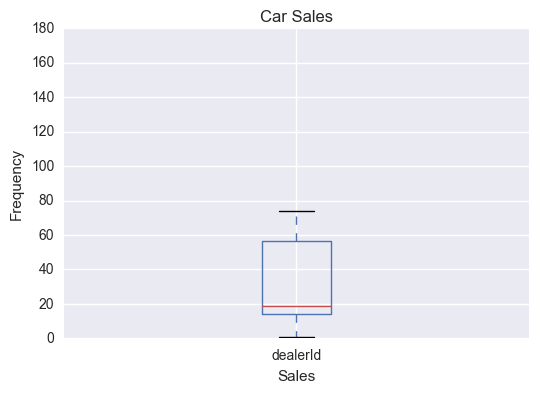

In [13]:
df.dealerId[df.hasSale == 1].value_counts().plot(kind = 'box', title ='Car Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

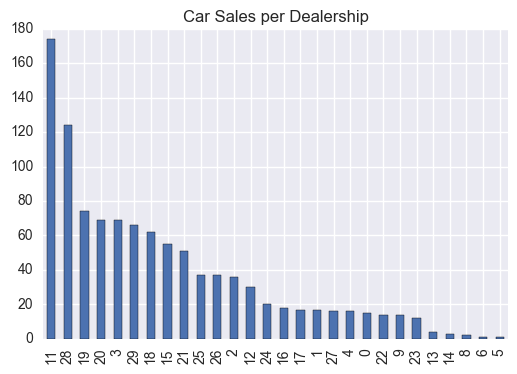

In [14]:
df.dealerId[df.hasSale == 1].value_counts().plot(kind = 'bar', title = 'Car Sales per Dealership')
plt.xlabel = ('Dealership Identification Number')
plt.ylabel = ('Frequency')

In [15]:
df = df.rename(columns={'rank': 'lead_score'})

In [16]:
df.lead_score.describe()

count    73458.000000
mean        37.374214
std         25.147461
min          2.000000
25%         17.000000
50%         30.000000
75%         52.000000
max        100.000000
Name: lead_score, dtype: float64

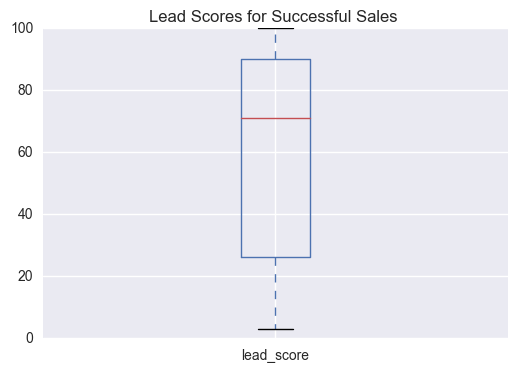

In [17]:
df.lead_score[df.hasSale == 1].plot(kind = 'box', title ='Lead Scores for Successful Sales ')

In [83]:
df.lead_score[df.hasSale == 1].describe()

count    1054.000000
mean       61.043643
std        32.504014
min         3.000000
25%        26.250000
50%        71.000000
75%        90.000000
max       100.000000
Name: lead_score, dtype: float64

In [18]:
df[df.hasSale == 1].mode()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,customerNumber,dealerId,hasSale,month,lead_score,soldVehicleVin
0,2,36,3,NaN,NaN,11,1,2015-11-01T04:00:00,100,-7.284978e+18


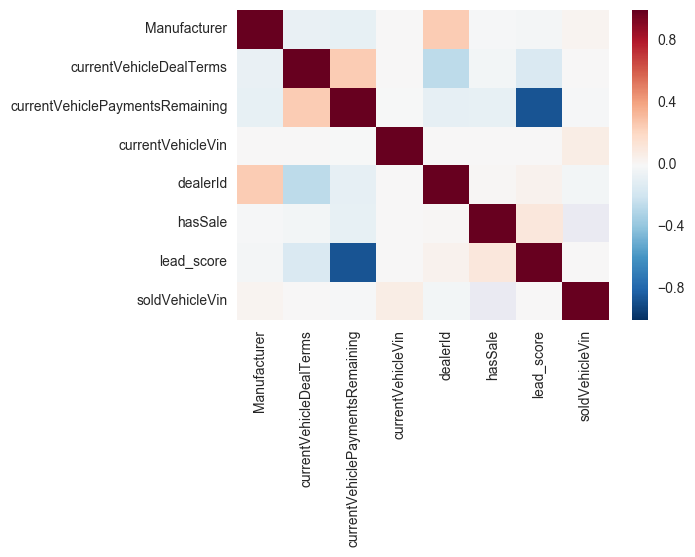

In [19]:
sns.heatmap(df.corr())

In [20]:
df.Manufacturer.value_counts()

3    36357
2    24698
1    12403
Name: Manufacturer, dtype: int64

In [21]:
df.Manufacturer[df.hasSale == 1].value_counts()

2    446
3    437
1    171
Name: Manufacturer, dtype: int64

In [24]:
# define X and y
feature_cols = ['Manufacturer','currentVehicleDealTerms' ,'currentVehiclePaymentsRemaining', 'lead_score']
X = df[feature_cols]
y = df.hasSale

In [25]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [26]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_Car_Sales.dot', feature_names=feature_cols)

In [27]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Manufacturer,0.000000
1,currentVehicleDealTerms,0.005545
2,currentVehiclePaymentsRemaining,0.873750
3,lead_score,0.120706


In [ ]:
# null accuracy
#y.value_counts(normalize=True)

In [28]:
from sklearn.cross_validation import cross_val_score
tree_scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy')
np.mean(tree_scores)

0.98563805883268041

In [29]:
# fit a classification tree with max_depth=  on all data
#from sklearn.tree import DecisionTreeClassifier
#treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
#treeclf.fit(X, y)
treeclf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [30]:
# max depth =2 beats null accuracy 
from sklearn.cross_validation import cross_val_score
tree_scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy')
np.mean(tree_scores)

0.98565167353656058

In [32]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# standardize X_train
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


# Recall that standard scalar does a basic z-score normalization
# So for each element, x, it computes z = (x - mean) / std
# This gives the entire series a mean of 0 and a standard deviation (and variance) of 1

# check that it standardized properly

# First column of X_train_scaled
print X_train_scaled[:, 0].mean() # 0
print X_train_scaled[:, 0].std()  # 1

# Second column of X_train_scaled
print X_train_scaled[:, 1].mean() # 0
print X_train_scaled[:, 1].std()  # 1

2.29891715189e-16
1.0
8.71847402345e-16
1.0


In [34]:
# standardize X_test
X_test_scaled = scaler.transform(X_test)

In [35]:
# First column of X_train_scaled
print X_test_scaled[:, 0].mean()
print X_test_scaled[:, 0].std()


# Second column of X_train_scaled
print X_test_scaled[:, 1].mean()
print X_test_scaled[:, 1].std()

-0.011661459354
1.0086087206
-0.00154277577836
0.99735473334


In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
#not better than classification tree
# KNN accuracy on original data
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.983827933569


In [38]:
#not better than classification tree
# KNN accuracy on scaled data
knn.fit(X_train_scaled, y_train)
y_pred_class = knn.predict(X_test_scaled)
print metrics.accuracy_score(y_test, y_pred_class)

0.984154641982


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.98296979207459645

In [40]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.98415416196456496

In [41]:
# search for an optimal n_neighbors value using GridSearchCV
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
neighbors_range = range(1, 30)
param_grid = dict(kneighborsclassifier__n_neighbors=neighbors_range)
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print grid.best_score_, grid.best_params_

0.985651664897 {'kneighborsclassifier__n_neighbors': 8}


In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor



In [49]:
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

In [50]:
models = [('rf', RandomForestClassifier(n_estimators=10)),
          ('decision', DecisionTreeClassifier(max_depth=3))
         ] 
# try a few models by themselves
for index, model in models:
    print index, np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    print

rf 0.982574986049

decision 0.985651666337



In [51]:
vc1 = VotingClassifier(models, voting='hard')
np.mean(cross_val_score(vc1, X, y, cv=5, scoring='accuracy'))

0.98565166633707935

In [52]:
vc2 = VotingClassifier(models, voting='soft')
np.mean(cross_val_score(vc2, X, y, cv=5, scoring='accuracy'))

0.98559721493495578

In [53]:
vc3 = VotingClassifier(models, voting='soft', weights=[2, 1])
np.mean(cross_val_score(vc1, X, y, cv=5, scoring='accuracy'))

0.98565166633707935

In [54]:
params = {'voting':['soft', 'hard'], 'weights':[[1, 1], [2, 1], [1, 2]], 'rf__n_estimators':range(10,50,10), 'decision__max_depth':[None, 1, 2]}

In [55]:
grid = GridSearchCV(vc3, params, cv=5, scoring='accuracy')

In [56]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            o...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))],
         voting='soft', weights=[2, 1]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'voting': ['soft', 'hard'], 'weights': [[1, 1], [2, 1], [1, 2]], 'rf__n_estimators': [10, 20, 30, 40], 'decision__max_depth': [None, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [57]:
grid.best_score_

0.98565166489694789

In [58]:
grid.best_params_

{'decision__max_depth': 1,
 'rf__n_estimators': 10,
 'voting': 'soft',
 'weights': [1, 2]}

In [62]:
from itertools import product

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [65]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

'''# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()'''

"# Plotting decision regions\nx_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\ny_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\n                     np.arange(y_min, y_max, 0.1))\n\nf, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))\n\nfor idx, clf, tt in zip(product([0, 1], [0, 1]),\n                        [clf1, clf2, clf3, eclf],\n                        ['Decision Tree (depth=4)', 'KNN (k=7)',\n                         'Kernel SVM', 'Soft Voting']):\n\n    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n\n    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)\n    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)\n    axarr[idx[0], idx[1]].set_title(tt)\n\nplt.show()"

In [68]:
#from sklearn import decomposition
#df['target_names'] = df.hasSale.map({0:'noSale', 1:'hasSale'})

In [74]:
#target_names = df.target_names